## Project II - Galaxy Shape Classification

Arnab Roy,
Brandon Welsh,
Sunny Kiluvia

February 2024

## Part 1: Load in the dataset

In [9]:
# Import required dependencies
import pandas as pd
import matplotlib.pyplot as plt

# NOTE the following comes from the file downloaded from https://github.com/mwalmsley/galaxy_mnist
from galaxy_mnist import GalaxyMNIST

In [3]:
# There are 10,000 images total. 80% of them (8,000) are for training.
# Load training data
df_galaxy_TRAIN = GalaxyMNIST(
    root='/home/walml/repos/galaxy_mnist/download_root',
    download=True,
    train=True  # True by default, or False for canonical test set
)

In [4]:
# There are 10,000 images total. 20% of them (2,000) are for testing.
# Load testing data
df_galaxy_TEST = GalaxyMNIST(
    root='/home/walml/repos/galaxy_mnist/download_root',
    download=True,
    train=False  # False for canonical test set
)

Dataset GalaxyMNIST
    Number of datapoints: 8000
    Root location: /home/walml/repos/galaxy_mnist/download_root
    Split: Train


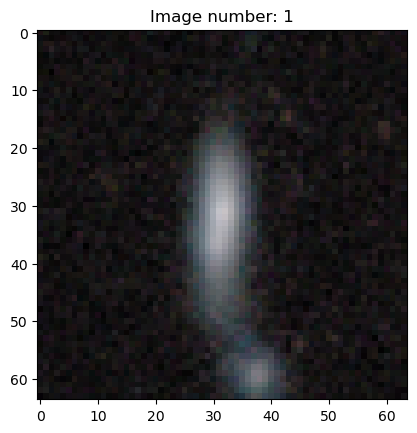

In [14]:
# Show training data
print(df_galaxy_TRAIN)

# Get the first image from the training set and its label
image, label = df_galaxy_TRAIN[0]

# Plot the image as an example
plt.imshow(image, cmap='gray')
plt.title(f'Galaxy Type: {label}')
plt.show()

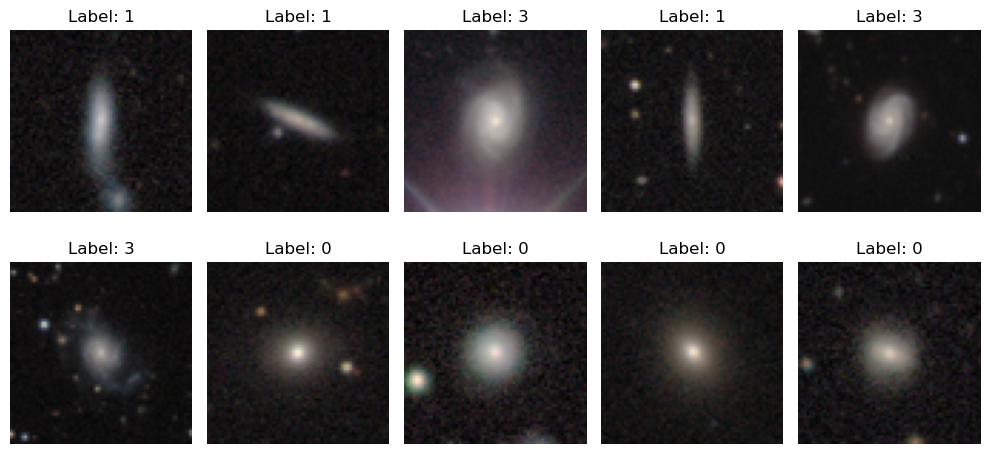

In [15]:
# I want to see the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Display the first 10 images from the training set
for i in range(10):
    image, label = df_galaxy_TRAIN[i]
    ax = axes[i//5, i%5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Galaxy Type: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Dataset GalaxyMNIST
    Number of datapoints: 2000
    Root location: /home/walml/repos/galaxy_mnist/download_root
    Split: Test


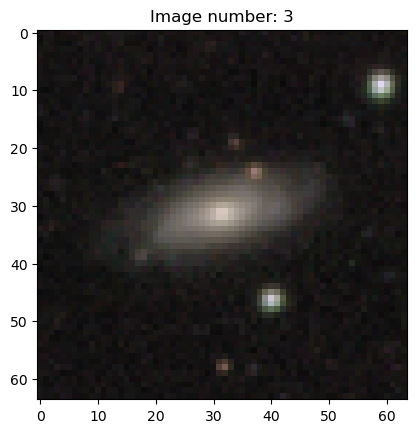

In [13]:
# Show testing data
print(df_galaxy_TEST)

# Get the first image from the testing set and its label
image, label = df_galaxy_TEST[0]

# Plot the image as an example
plt.imshow(image, cmap='gray')
plt.title(f'Galaxy Type: {label}')
plt.show()

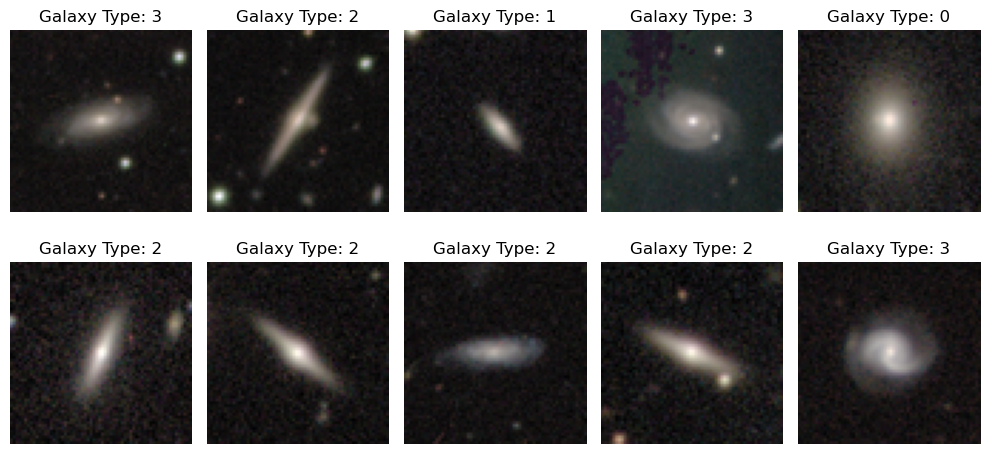

In [16]:
# I want to see the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Display the first 10 images from the training set
for i in range(10):
    image, label = df_galaxy_TEST[i]
    ax = axes[i//5, i%5]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Galaxy Type: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()